# Working on analysis part of topic modeling

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
import sys
import re, numpy as np, pandas as pd

In [3]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel

In [5]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

# Loading file

In [6]:
import pickle

In [7]:
data = pd.read_pickle('work_on_data.pkl')

In [8]:
data.shape

(68762, 7)

In [9]:
data.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,year,assignee
0,0,2.0,0.4404,"charge, battery, module, power, electric, syst...","[electrical, energy, system, include, electric...",1990.0,luz electric fuel israel ltd
1,1,2.0,0.8034,"charge, battery, module, power, electric, syst...","[electrical, energy, system, include, electric...",1990.0,luz electric fuel israel ltd
2,2,0.0,0.4697,"catalyst, exhaust, gas, parking, fuel, tempera...","[object, provide, particulate, trap, diesel, e...",1995.0,sumitomo electric industries ltd
3,3,6.0,0.4055,"side, portion, cover, body, housing, part, sur...","[purpose, obtain, trap, leakage, exhaust, gas,...",1995.0,sumitomo electric ind ltd
4,4,2.0,0.3990,"charge, battery, module, power, electric, syst...","[particulate, trap, diesel, engine, design, ef...",1995.0,sumitomo electric industries ltd
5,5,0.0,0.4922,"catalyst, exhaust, gas, parking, fuel, tempera...","[pct, pct_jp_sec_date, pub, mar, object, provi...",1995.0,sumitomo electric industries ltd
6,6,6.0,0.6130,"side, portion, cover, body, housing, part, sur...","[mix, device, gas, fuel, air, internal, combus...",2000.0,ricardo cayetano algeri
7,7,6.0,0.5955,"side, portion, cover, body, housing, part, sur...","[mix, device, gas, fuel, air, internal, combus...",2000.0,algeri; ricardo cayetano
8,8,6.0,0.5115,"side, portion, cover, body, housing, part, sur...","[area, mouth, injector, construct, flow, guide...",1998.0,avl list gmbh
9,9,5.0,0.8511,"air, gas, fuel, exhaust, tank, pipe, pressure,...","[internal, combustion, engine, least, injectio...",1998.0,avl list gmbh


# Figure 3

In [10]:
data.groupby(data.year).size()

year
1990.0     631
1991.0     732
1992.0    1008
1993.0    1205
1994.0    1154
1995.0    1285
1996.0    1483
1997.0    1581
1998.0    1726
1999.0    2003
2000.0    2211
2001.0    2267
2002.0    2219
2003.0    2431
2004.0    2310
2005.0    2641
2006.0    3498
2007.0    3444
2008.0    3259
2009.0    3754
2010.0    4659
2011.0    5737
2012.0    5242
2013.0    4247
2014.0    3420
2015.0    2686
2016.0    1568
2017.0     359
dtype: int64

In [11]:
dist=data.groupby(data.year).size()

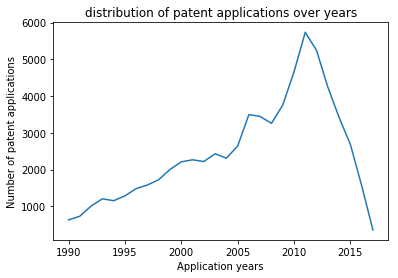

In [12]:
dist.plot()
plt.xlabel('Application years')
plt.ylabel('Number of patent applications')
plt.title('distribution of patent applications over years')
#plt.legend()
plt.show()

# Table1

In [13]:
total_patents=data.assignee.value_counts()

In [14]:
df_assigne= pd.DataFrame(data=total_patents)
df_assigne.head()

,assignee
toyota motor corp,8125
honda motor co ltd,3977
nissan motor co ltd,2885
bosch corp,2770
hyundai motor co ltd,2597


In [15]:
df_assigne['Commulative']=data['assignee'].value_counts(normalize=True)
df_assigne.head(20)

,assignee,Commulative
toyota motor corp,8125,0.119044
honda motor co ltd,3977,0.058269
nissan motor co ltd,2885,0.042270
bosch corp,2770,0.040585
hyundai motor co ltd,2597,0.038050
ford global technologies inc,1671,0.024483
denso corp,1097,0.016073
mitsubishi motors corp,899,0.013172
renault sas,859,0.012586
hitachi ltd,759,0.011121


### 4a) Change in the number of patents 

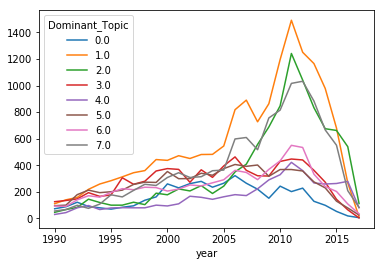

In [16]:
d=data
d=d.groupby(["year","Dominant_Topic"]).size()
d=d.unstack('Dominant_Topic')
d.plot()

In [17]:
data.Dominant_Topic.value_counts()

1.0    15836
7.0    11195
2.0    10316
3.0     7860
5.0     7338
6.0     7048
4.0     4699
0.0     4470
Name: Dominant_Topic, dtype: int64

**Alternative way**

In [18]:
f=data.groupby(data.year).Dominant_Topic.value_counts()

In [19]:
f=f.unstack('Dominant_Topic')

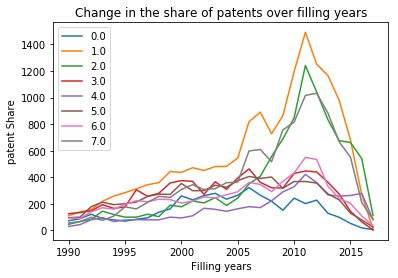

In [20]:
f.plot()
plt.xlabel('Filling years')
plt.ylabel('patent Share')
plt.title('Change in the share of patents over filling years')
plt.legend()
plt.show()

**result of figure 4a**

### 4(b) Change in the share of patents over filing year

In [21]:
data.Dominant_Topic.value_counts(normalize=True)

1.0    0.230302
7.0    0.162808
2.0    0.150025
3.0    0.114307
5.0    0.106716
6.0    0.102498
4.0    0.068337
0.0    0.065007
Name: Dominant_Topic, dtype: float64

In [22]:
data.groupby(data.year).Dominant_Topic.value_counts(normalize=True)

year    Dominant_Topic
1990.0  3.0               0.199683
        1.0               0.175911
        5.0               0.152139
        6.0               0.147385
        0.0               0.115689
        7.0               0.088748
        2.0               0.072900
        4.0               0.047544
1991.0  1.0               0.191257
        3.0               0.184426
        5.0               0.136612
        6.0               0.124317
        0.0               0.120219
        2.0               0.091530
        7.0               0.091530
        4.0               0.060109
1992.0  5.0               0.177579
        1.0               0.156746
        3.0               0.145833
        6.0               0.138889
        0.0               0.121032
        7.0               0.098214
        2.0               0.082341
        4.0               0.079365
1993.0  1.0               0.181743
        5.0               0.176763
        3.0               0.160996
        6.0               0.1419

In [23]:
c=data.groupby(data.year).Dominant_Topic.value_counts(normalize=True)

In [24]:
c=c.unstack('Dominant_Topic')

In [25]:
c

Dominant_Topic,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
year,,,,,,,,
1990.0,0.115689,0.175911,0.072900,0.199683,0.047544,0.152139,0.147385,0.088748
1991.0,0.120219,0.191257,0.091530,0.184426,0.060109,0.136612,0.124317,0.091530
1992.0,0.121032,0.156746,0.082341,0.145833,0.079365,0.177579,0.138889,0.098214
1993.0,0.074689,0.181743,0.120332,0.160996,0.080498,0.176763,0.141909,0.063071
1994.0,0.069324,0.224437,0.103986,0.143847,0.058059,0.168111,0.138648,0.093588
1995.0,0.054475,0.221012,0.077821,0.137743,0.061479,0.156420,0.152529,0.138521
1996.0,0.056642,0.211059,0.067431,0.206339,0.054619,0.143628,0.151045,0.109238
1997.0,0.060089,0.217584,0.077166,0.162555,0.050601,0.161923,0.136622,0.133460
1998.0,0.079374,0.208575,0.060255,0.162225,0.046350,0.158169,0.136153,0.148899


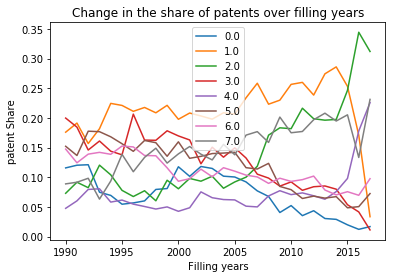

In [26]:
c.plot()
plt.xlabel('Filling years')
plt.ylabel('patent Share')
plt.title('Change in the share of patents over filling years')
plt.legend()
plt.show()

# Share of patents by  technological topics

table 3 in paper

In [ ]:
# start with 2010
df.groupby(df.Filling_Date.dt.year==2010).TOPIC.value_counts()

2849 for 2010<br>
2849/34223=8.32 %

In [ ]:
# For 2011
df.groupby(df.Filling_Date.dt.year==2011).TOPIC.value_counts()

for year 2010, we have told of 3816 which has patent share of <br>

3816/34223=11.15%

In [ ]:
# for 2012
df.groupby(df.Filling_Date.dt.year==2012).TOPIC.value_counts()

For 2012, 3231 <br>
9.44%

In [ ]:
# for 2013
df.groupby(df.Filling_Date.dt.year==2013).TOPIC.value_counts()

In [ ]:
# for 2013, count function used instead of summing all one by one
df.groupby(df.Filling_Date.dt.year==2013).TOPIC.count()

In [ ]:
2615/34223

In [ ]:
# for 2014, count function used instead of summing all one by one
df.groupby(df.Filling_Date.dt.year==2014).TOPIC.count()

In [ ]:
2165/34223

In [ ]:
# for 2015, count function used instead of summing all one by one
df.groupby(df.Filling_Date.dt.year==2015).TOPIC.count()

In [ ]:
1744/34223

In [ ]:
# for 2016, count function used instead of summing all one by one
df.groupby(df.Filling_Date.dt.year==2016).TOPIC.count()

In [ ]:
1040/34223

In [ ]:
# for 2017, count function used instead of summing all one by one
df.groupby(df.Filling_Date.dt.year==2017).TOPIC.count()

In [ ]:
198/34223

In [ ]:
# for 2018, count function used instead of summing all one by one
df.groupby(df.Filling_Date.dt.year==2018).TOPIC.count()

In [ ]:
1/34223

**The average patent share in 2012 by topic was 9.44%. So, we will take it as reference value to determine whether given patent is samll or large**

In [ ]:
## for 2012
df.groupby(df.Filling_Date.dt.year==2012).TOPIC.value_counts()

In [ ]:
df.groupby(df.Filling_Date.dt.year==2012).TOPIC.count()

In [ ]:
# For 2012,current patent share
df.groupby(df.Filling_Date.dt.year==2012).TOPIC.value_counts(normalize=True)

### Calculate CAGR
https://www.investopedia.com/terms/c/cagr.asp

We will consider years from 2010-2014

In [ ]:
df.groupby(df.Filling_Date.dt.year==2010).TOPIC.value_counts()

Initial values for patent share are given 

In [ ]:
df.groupby(df.Filling_Date.dt.year==2015).TOPIC.value_counts()

# 4) Firm-level analysis

In [ ]:
patent=pd.read_csv('patent_all_en_new.csv')

In [ ]:
patent.head()

In [ ]:
data = pd.read_pickle('top10_topic_dominant.pkl')

In [ ]:
data['assignee']=patent['earliest_applt']

In [ ]:
data.head()

In [ ]:
# checking value count of topics
data.Dominant_Topic.value_counts()

In [ ]:
type(data)

In [ ]:
data.assignee.value_counts().head()

There are 15292 firm names in our datasets. We got to be sure there are no duplicates.<br>
By duplicates mean the names with different case letter, different name representation etc

In [ ]:
assignee_topic=data.groupby(data.assignee).Dominant_Topic.value_counts()

In [ ]:
df_assigne_topic= pd.DataFrame(data=assignee_topic)

In [ ]:
df_assigne_topic.head(30)